<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/physics/variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 変分原理のデモ

調和振動子の作用（汎関数）
\begin{equation}
    S[q]
    =\int dt \left(\frac{1}{2}m\dot{q}(t)^2-\frac{1}{2}kq(t)^2\right)
\end{equation}
に対する変分原理を最適化問題として解く。

len(t_list)=600, dt = 0.016666666666666666


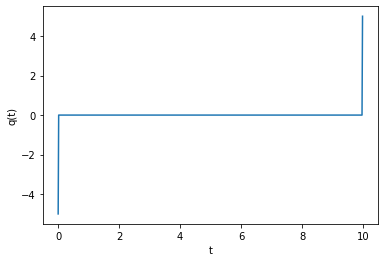

In [55]:
import numpy as np
import matplotlib.pyplot as plt

t_list = np.arange(0, 10, 1/60)
dt = t_list[1] - t_list[0]
print(f"len(t_list)={len(t_list)}, dt = {dt}")
q_first, q_last = -5, 5
q_list = np.linspace(0, 0, len(t_list)-2)

plt.plot(t_list, np.hstack([q_first, q_list, q_last]))
plt.xlabel("t")
plt.ylabel("q(t)")
plt.show()

In [45]:
def dq_list(q_list: np.ndarray) -> np.ndarray:
    result = np.array([(q_list[idx+1] - q_list[idx-1]) / (2 * dt)
                        for idx in range(1, len(q_list)-1)])
    first = (q_list[1]-q_first) / (2 * dt)
    last = (q_last - q_list[-2]) / (2 * dt)
    result = np.hstack([first, result, last])
    return result

print(f"len(dq_list)={len(dq_list(q_list))}")

len(dq_list)=598


In [51]:
m, k = 1, 1

def action(q_list: np.ndarray) -> float:
    v_first = (q_list[0] - q_first) / dt
    v_last = (q_last - q_list[-1]) / dt
    kinetic_energy = 0.5 * m * (v_first**2 + np.sum(dq_list(q_list)**2) * dt + v_last **2)
    potential_energy = 0.5 * k * (q_first **2 + np.sum(q_list**2) * dt + q_last **2)
    return kinetic_energy - potential_energy

print(f"action = {action(q_list)}")

action = -61.64598233116073


In [56]:
from scipy.optimize import minimize

def minimize_callback(xk) -> bool:
    print(f"action={action(xk)}")

res = minimize(action, q_list, method="BFGS", callback=minimize_callback)
res.x

action=66483.16476086629
action=57394.390630758455
action=41645.21607925345
action=41222.76681018277
action=37234.37468098484
action=31436.23044271683
action=25579.184915854745
action=18544.2972188513
action=10656.13019947545
action=5883.80176401266
action=4291.298324832842
action=2932.254884076802
action=2685.0540144567294
action=2294.5590191779556
action=1782.3404062493962
action=1217.1911877989392
action=741.6363977934266
action=474.72782944761485
action=311.4851890276017
action=235.95947493024843
action=173.7706135572272
action=137.68573720171008
action=102.40812052111707
action=72.98068865490877
action=48.38612199775038
action=31.182598384858572
action=20.364454161210265
action=13.93968709222932
action=9.895757892472062
action=7.180861815031477
action=5.069207987542423
action=3.2757182069623205
action=1.6318186497925815
action=0.11535820068084846
action=-1.2209222464386293
action=-2.3234118537920416
action=-3.2163908750395507
action=-3.978127426336858
action=-4.6968655606389405
ac

array([-5.03537932e+00, -1.20778230e+01, -1.21068246e+01, -1.91173619e+01,
       -1.91456271e+01, -2.63816743e+01, -2.64106891e+01, -3.38468030e+01,
       -3.38762139e+01, -4.14739868e+01, -4.15039565e+01, -4.93155492e+01,
       -4.93462140e+01, -5.72555294e+01, -5.72868422e+01, -6.52528781e+01,
       -6.52843842e+01, -7.34758887e+01, -7.35084987e+01, -8.18713219e+01,
       -8.19050623e+01, -9.02218906e+01, -9.02556991e+01, -9.83971966e+01,
       -9.84306166e+01, -1.06684088e+02, -1.06718232e+02, -1.14903261e+02,
       -1.14937394e+02, -1.22994098e+02, -1.23027852e+02, -1.30859716e+02,
       -1.30892641e+02, -1.38419732e+02, -1.38451557e+02, -1.45738348e+02,
       -1.45769198e+02, -1.52836805e+02, -1.52866778e+02, -1.59679022e+02,
       -1.59707978e+02, -1.66388879e+02, -1.66417339e+02, -1.72758985e+02,
       -1.72786020e+02, -1.78929292e+02, -1.78955676e+02, -1.84857190e+02,
       -1.84882692e+02, -1.90595430e+02, -1.90620234e+02, -1.96088641e+02,
       -1.96112743e+02, -

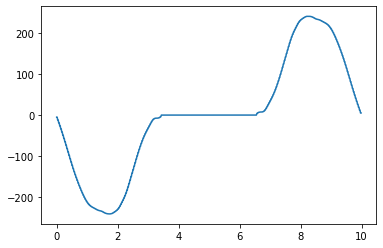

In [57]:
plt.plot(t_list, np.hstack([q_first, res.x, q_last]))